<a href="https://colab.research.google.com/github/AnyueWang/ExerciseProjects/blob/main/multiclass_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied


In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip the data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()

--2022-12-22 10:40:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.6MB/s    in 12s     

2022-12-22 10:40:30 (40.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "10_food_classes_all_data".
There are 10 directories and 0 images in "10_food_classes_all_data/test".
There are 0 directories and 250 images in "10_food_classes_all_data/test/steak".
There are 0 directories and 250 images in "10_food_classes_all_data/test/ice_cream".
There are 0 directories and 250 images in "10_food_classes_all_data/test/hamburger".
There are 0 directories and 250 images in "10_food_classes_all_data/test/chicken_wings".
There are 0 directories and 250 images in "10_food_classes_all_data/test/chicken_curry".
There are 0 directories and 250 images in "10_food_classes_all_data/test/pizza".
There are 0 directories and 250 images in "10_food_classes_all_data/test/grilled_salmon".
There are 0 directories and 250 images in "10_food_classes_all_data/test/ramen".
There are 0 directories and 250 images in "10_food_classes_all_data/test/sushi".
There are 0 directories and 250 images in "10_food_classes_all_data/test/fried_rice".
There are 

In [3]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

['2290185.jpg']
Image shape: (512, 512, 3)


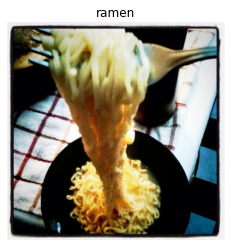

In [6]:
import random
img = view_random_image(target_dir=train_dir,
             target_class=random.choice(class_names))


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                         target_size=(224,224),
                         batch_size=32,
                         class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [8]:
len(train_data)

235

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf

model_8 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),

    Dense(10,activation='softmax')
])

In [10]:
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

In [11]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [12]:
history_8 = model_8.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 205ms/step - loss: 2.1779 - accuracy: 0.1943 - val_loss: 2.0766 - val_accuracy: 0.2348
Epoch 2/5
235/235 [==============================] - 47s 202ms/step - loss: 1.8836 - accuracy: 0.3447 - val_loss: 1.8222 - val_accuracy: 0.3640
Epoch 3/5
235/235 [==============================] - 48s 204ms/step - loss: 1.5678 - accuracy: 0.4687 - val_loss: 1.9381 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 47s 200ms/step - loss: 1.0558 - accuracy: 0.6603 - val_loss: 2.1235 - val_accuracy: 0.3168
Epoch 5/5
235/235 [==============================] - 47s 200ms/step - loss: 0.5395 - accuracy: 0.8276 - val_loss: 2.7400 - val_accuracy: 0.2980


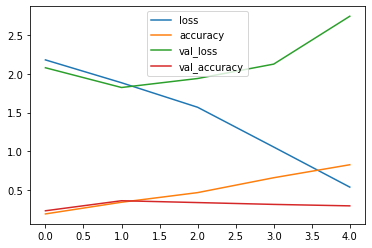

In [14]:
import pandas as pd

pd.DataFrame(history_8.history).plot()

In [15]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 2.7400 - accuracy: 0.2980


[2.7399680614471436, 0.2980000078678131]

### fix overfitting

* **get more data**
* **simplify the model**
* **use data augmentation**
* **use transfer learning**


In [17]:
model_9 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy'])

In [18]:
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [20]:
history_9 = model_9.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 2.1222 - accuracy: 0.2421 - val_loss: 1.9785 - val_accuracy: 0.2948
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.8420 - accuracy: 0.3652 - val_loss: 1.9153 - val_accuracy: 0.3192
Epoch 3/5
235/235 [==============================] - 46s 194ms/step - loss: 1.6348 - accuracy: 0.4469 - val_loss: 1.8696 - val_accuracy: 0.3508
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 1.3456 - accuracy: 0.5631 - val_loss: 1.9842 - val_accuracy: 0.3232
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.9324 - accuracy: 0.7108 - val_loss: 2.1477 - val_accuracy: 0.3252


In [21]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                        rotation_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        horizontal_flip=True)

In [23]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                   target_size=(224,224),
                                   batch_size=32,
                                   class_mode='categorical',
                                   shuffle=True)

Found 7500 images belonging to 10 classes.


In [24]:
history_9 = model_9.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 486ms/step - loss: 2.0802 - accuracy: 0.2731 - val_loss: 1.8640 - val_accuracy: 0.3452
Epoch 2/5
235/235 [==============================] - 110s 468ms/step - loss: 2.0022 - accuracy: 0.2993 - val_loss: 1.9103 - val_accuracy: 0.3300
Epoch 3/5
235/235 [==============================] - 124s 529ms/step - loss: 1.9490 - accuracy: 0.3263 - val_loss: 1.8432 - val_accuracy: 0.3664
Epoch 4/5
235/235 [==============================] - 119s 507ms/step - loss: 1.9297 - accuracy: 0.3300 - val_loss: 1.8028 - val_accuracy: 0.3792
Epoch 5/5
235/235 [==============================] - 140s 598ms/step - loss: 1.9112 - accuracy: 0.3416 - val_loss: 1.7167 - val_accuracy: 0.4084


In [25]:
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss='categorical_crossentropy',
         optimizer=tf.keras.optimizers.Adam(),
         metrics=['accuracy'])

In [27]:
model_10 = model_10.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 115s 488ms/step - loss: 2.3087 - accuracy: 0.1183 - val_loss: 2.2647 - val_accuracy: 0.1376
Epoch 2/5
235/235 [==============================] - 114s 483ms/step - loss: 2.1985 - accuracy: 0.1856 - val_loss: 2.1165 - val_accuracy: 0.2296
Epoch 3/5
235/235 [==============================] - 114s 483ms/step - loss: 2.1070 - accuracy: 0.2407 - val_loss: 1.9837 - val_accuracy: 0.2856
Epoch 4/5
235/235 [==============================] - 112s 478ms/step - loss: 2.0632 - accuracy: 0.2629 - val_loss: 1.9643 - val_accuracy: 0.2852
Epoch 5/5
235/235 [==============================] - 113s 480ms/step - loss: 2.0214 - accuracy: 0.2776 - val_loss: 1.8969 - val_accuracy: 0.3256


### Repeat until satisfied

* restructuring the model architecture (layers, hidden units)
* adjust the learning rate
* try different methods of data augmentation
* training for longer
* transfer learning


In [28]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [40]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-12-22 11:58:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.02s   

2022-12-22 11:58:15 (81.1 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2022-12-22 11:58:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

In [41]:
def load_and_prep_image(filename,img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=[img_shape,img_shape])
  img = img/255.
  return img

In [50]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  print(pred[0])
  pred_class = class_names[tf.argmax(pred[0])]
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 15ms/step
[0.01408507 0.06260718 0.02163163 0.35011292 0.05277839 0.06962002
 0.01481831 0.09692232 0.26951113 0.04791299]


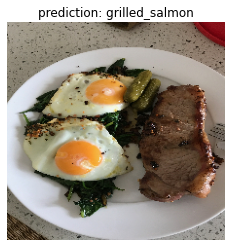

In [53]:
pred_and_plot(model=model_9,
       filename='03-steak.jpeg',
       class_names=list(class_names))

### Saving and loading the model

In [60]:
model_9.save('saved_trained_model_9')

In [61]:
loaded_model_9 = tf.keras.models.load_model('saved_trained_model_9')
loaded_model_9.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 1.7167 - accuracy: 0.4084


[1.716657280921936, 0.4083999991416931]